# k近邻法

K 最近邻(k-Nearest Neighbor，KNN)分类算法，是一个理论上比较成熟的方法，也是最简单的机器学习算法之一。

该方法的思路是：如果一个样本在特征空间中的k个最相似（即特征空间中最邻近）的样本中的大多数属于某一个类别，则该样本也属于这个类别。

## 1.1 k近邻算法
* 输入：训练数据集

    $T = \{(x_1, y_1), (x_2, y_2),\cdots, (x_N, y_N)\}$

    其中，$x_i\subseteq R^n$ 为实例的特征向量，$y_i\in\{c_1,c_2,\cdots,c_k\}$ 为实例的类别。


* 输出：实例 $x$ 所属的类别

（1） 根据给定的距离度量，在训练集 $T$ 中找出与 $x$ 最近邻的 $k$ 个点，涵盖这 $k$ 个点的 x 的邻域记作 $N_k(x)$；

（2） 在 $N_k(x)$ 中根据分类决策规则（如多数表决）决定 $x$ 的类别 $y$：

$y=\arg \max_{c_j} \sum_{x_i\in N_k(x)} I(y_i=c_i), \quad i=1,2,\ldots,N; \quad j=1,2,\ldots,K$

其中，$I$ 为只是函数，当 $y_i=c_i$ 时 $I$ 为 1，否则 $I$ 为0。


## 1.2 k近邻模型

k 近邻模型由3个基本要素决定：距离度量、k 值选择和分类决策规则。

### 1.21 距离度量

特征空间中两个实例点的距离是其相似程度的反映。k 近邻模型的特征空间一般是 n 维实数向量空间 $R^n$。使用的距离是欧式距离，或其他距离，如 $L_p$ 距离。

$L_p$ 距离定义如下：

In [1]:
import numpy as np
def distance(point, data, p):
    if p < 1:
        raise ValueError('p >= 1')
    if p == float('inf'):
        return np.amax(np.abs(data - point))
    elif p == 1:
        return np.sum(np.abs(data - point), axis=1)
    else:
        return np.power(np.sum(np.abs(data - point) ** p, axis=1), 1/p)

### 1.22 k值的选择

k 值的选择会对结果产生重大影响。

选择小的 k 值，对应的近似误差（approximation error）会减小，只有与输入实例较近的训练实例才会对预测结果起作用。但缺点是估计误差（estimation error）会增大，预测结果对近邻的实例点非常敏感。如果邻近的点恰巧是噪声，预测就会出错。

k 值的减小意味着整体模型变得复杂，容易发生过拟合。k 值增大意味着模型变得简单，近似误差增大。

### 1.23 分类决策规则

一般采用多数表决，决策结果由输入实例的 k 个邻近的训练实例的多数类决定。下面的决策函数返回 k 个近邻标签中出现次数最多的1个标签。

In [2]:
def decision(labels_list):
    count = np.bincount(labels_list)
    return np.argmax(count)

其中，`np.bincount(x)` 函数返回一个长度为 `max(x)+1` 的序列，`np.bincount(x)[i]` 的值为数字 `i` 在 `x` 中出现的次数。因此，`count` 中最大值的索引值即为 `labels_list` 中出现最多次的值。当然，此分类规则还很粗糙，考虑细致点，可引入投票权重，即越近的点权重最大，越远的点权重越小。

## 2.1 k近邻简单实现

此处不仅返回了标签，还返回了距离和点的具体值。

In [3]:
def knn(point, data, k, p, labels=[]):
    '''
    输入：point: 输入实例点，np.array()格式；data: 数据集，np.array()格式；
        labels：数据集data的标签，np.array()格式；k: 近邻点数量；p: Lp距离量度。
    输出：dist_list：k个最小距离；point_list：k个近邻点；labels_list：对应标签；
        均为np.array()格式。
    '''
    dist_all = distance(point, data, p)
    sort_list = np.argsort(dist_all)
    dist_list = dist_all[sort_list][:k]
    point_list = data[sort_list][:k]
    labels_list = None
    if len(labels):
        labels_list = labels[sort_list][:k]   
    return dist_list, point_list, labels_list

## 2.2 结果分析

手写数字识别数据集 [MNIST](http://yann.lecun.com/exdb/mnist/) 是机器学习中常用来作为训练测试数据的一个经典数据集。[MNIST](http://yann.lecun.com/exdb/mnist/) 数据集中所有图片用28 * 28的矩阵表示，矩阵中的每个值在 0-255 之间。可从 [MNIST]( http://yann.lecun.com/exdb/mnist/) 下载。

首先需要读取 MNIST 数据，并转化为 `np.array()` 格式，以便于处理。这里读取 MNIST 数据直接采用别人已经写好的`mnist`包，这个包可以通过 `pip install python-mnist` 安装。

但是，值得注意的是，包中默认的 MNSIST 读取文件名为 `t10k-images-idx3-ubyte`，然而实际从 MNIST 网站下载的数据包文件名为 `t10k-images.idx3-ubyte`，所以需要改一下下载的数据包名称，或者改包中的源码。

In [4]:
from mnist import MNIST

mndata = MNIST('.\mnist')
imdata, imlab = mndata.load_training()
tsdata, tslab = mndata.load_testing()

imdata_ar = np.array(imdata)
imlab_ar = np.array(imlab)
tsdata_ar = np.array(tsdata)

In [5]:
print('训练数据的长度为：', len(imdata))
print('每个样本的维数为：', len(imdata[0]))
print('第一个数据的具体值为：', imdata[0])

训练数据的长度为： 60000
每个样本的维数为： 784
第一个数据的具体值为： [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 18, 18, 18, 126, 136, 175, 26, 166, 255, 247, 127, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 30, 36, 94, 154, 170, 253, 253, 253, 253, 253, 225, 172, 253, 242, 195, 64, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 49, 238, 253, 253, 253, 253, 253, 253, 253, 253, 251, 93, 82, 82, 56, 39, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 18, 219, 253, 253, 253, 253, 253, 198, 182, 247, 241, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 80, 156, 107, 253, 253, 205, 11, 0, 43, 154, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

测试样本采用 [MNIST](http://yann.lecun.com/exdb/mnist/) 数据集，取全部训练样本（60000个）和测试样本（10000个）试验，测试结果显示在(k=1, p=2)时识别误差为 3.09%，在(k=3, p=2)下识别误差为 2.95%。

考虑运行时间，本页面只取前100个样本测试，具体代码如下（运行时间约70秒）：

In [6]:
import time

t1 = time.time()

k = 3  #3近邻
p = 2
is_right = []
results = []
for i in range(100):
    dist_list, point_list, labels_list = knn(tsdata_ar[i], imdata_ar, k, p, imlab_ar)
    reslab = decision(labels_list)
    results.append(reslab)
    if reslab == tslab[i]:
        is_right.append(1)
    else:
        is_right.append(0)

error = is_right.count(0) / len(is_right)
t2 = time.time()
print('{0}近邻下错误率为：{1}'.format(k, error))
print('运行时间为:', t2-t1)

3近邻下错误率为：0.01
运行时间为: 48.45615339279175


## 3.1 kd树

kd树（k-dimensional tree）是一种便于对k维空间的数据进行快速检索的数据结构。kd树是二叉树，表示对k维空间的一个划分，其每个节点对应于k维空间划分中的一个超矩形区域。利用kd树可以省去对大部分数据点的搜索，从而减少搜索的计算量。

注意，此处的 k 为每个节点的维数。

## 3.2 构造平衡kd树

* 输入：k 维空间数据集 $T=\{x_1, x_2, \ldots, x_N\}$
    其中 $x_i=(x_i^(1), x_i^(2), \ldots, x_i^(k))^T, \quad i=1,2,\ldots,N$；
    
    
* 输出： kd 树。

（1）开始：构造根节点。
    计算 k 个方差，以方差最大的维数为根节点的切分方向，按方差最大的维数对数据集排序，以切分方向的中位数作为当前节点的值。
    
（2）切分：上一步构建的节点将数据集切分为两个子集。
    中位数左边的子集作为该节点的左子节点，右子集作为右子节点。
    
（3）重复：分别对左子节点、右子节点重复以上步骤，直到所有数据分割完毕。

此方法构建的二叉树为的深度为 $\log_2(N)$。以下为建立kd树的实现：

In [7]:
#kd树节点
class Node:
    '''
    树的节点对象
    属性：
        point: 当前节点值，
        lchild: 左子节点，
        rchild: 右子节点，
        dim: 当前节点分割维度
    '''
    def __init__(self, point, lchild, rchild, dim):
        self.point = point
        self.lchild = lchild
        self.rchild = rchild
        self.dim = dim
        
def kd_build(data):
    '''
    功能：建立kd树
    输入：包含所有样本点的数据组，要求为np.array格式，
        每行对应一个样本，每列对应一个维度
    输出：Node对象
    '''
    if not len(data):
        point = None
        lchild = None
        rchild = None
        split_dim = None
    elif len(data) == 1:
        point = data[0]
        lchild = None
        rchild = None
        split_dim = None
    elif data.size == len(data):
        point = data
        lchild = None
        rchild = None
        split_dim = None
    else: 
        variance_data = np.var(data, axis=0)  #求各个维度的方差
        split_dim = np.argsort(variance_data)[-1]  #取方差最大的维度作为分割维度
        data = data[data[:,split_dim].argsort()]  #按分割维度对数据排序
        point = data[len(data) // 2]  #取排序后的中位数作为当前节点
        ldata = data[:len(data) // 2]  #当前节点左边为左区域
        rdata = data[len(data) // 2 + 1:]  #当前节点右边为右区域
        if ldata.size == 0:
            lchild = None
        else: 
            lchild = kd_build(ldata)
        if rdata.size == 0:
            rchild = None
        else:
            rchild = kd_build(rdata)
    return Node(point, lchild, rchild, split_dim)

## 3.3 kd树的最近邻搜索

* 输入：已构造的kd树，目标点x；


* 输出：x的最近邻点。


（1）在kd树中找出包含点x的叶节点：从根节点开始不断向下访问kd树，若目标点x当前维数的坐标小于节点坐标，则移动到左子节点，否则移动到右子节点，直

到不存在左子节点或右子节点；注意到此处保存了搜索路径，在后面向上查找时有重要作用。

In [8]:
def find_leaf(point, kdtree):
    '''
    功能：搜索point所在区域的叶节点，同时保存搜索路径;
    输入：point: 目标点，为 1*n 的 np.array; 
        kdtree: kd树;
        route: 递归的记录搜索路径，默认为空列表，0为左，1为右;
    输出：叶节点, 路径;
    例子：
        point = np.array([3, 4.5])
        data = np.array([[2, 3], [5, 4], [9, 6], [4, 7], [8, 1], [7, 2]])
        kdtree = kd_build(data)  
        [leaf, route] = find_leaf(point, kdtree)
        [leaf.point, route]
        [array[(4,7)], [0, 1]] 
    '''
    route = []
    while kdtree.lchild and kdtree.rchild:
        if point[kdtree.dim] <= kdtree.point[kdtree.dim]:
            kdtree = kdtree.lchild
            route.append(0)
        else:
            kdtree = kdtree.rchild
            route.append(1)
    else:
        return kdtree, route

（2）以此节点为“当前最近点”。

（3）递归地向上回退，在每个节点执行以下操作：

    （a）如果该节点保存的实例点比当前点距离目标点更近，则以该实例点为“当前最近点”；
    
    （b）检查该节点的另一子节点区域内是否有更近的点；具体地，检查该节点的另一子节点的区域是否与以目标点为球心、以目标点与“当前最近点”距离为半径的球体相交；如果相交，可能该节点的另一子节点对应区域内存在距目标点更近的点，移动到另一子节点，接着，递归地进行最近邻搜索。
 
（4）当回退到根节点时，搜索结束，最后的“当前最近点”即为x的最近邻点。

In [9]:
def get_distance(point1, point2, p=2):
    '''
    功能：求两点之间的Lp距离，Lp距离定义如下：
    Lp(x1, x2)=sum(|x1-x2|^p)^(1/p), for p>=1
    '''
    if p < 1:
        raise ValueError('p >= 1')
    if p == float('inf'):
        return np.amax(np.abs(point1 - point2))
    elif p == 1:
        return np.sum(np.abs(point1 - point2))
    else:
        return np.power(np.sum(np.abs(point1 - point2) ** p), 1/p)


def find_node(kdtree, route):
    '''
    功能：根据路径找节点
    输入：kdtree: kd树;
        route: 路径, 路径由0, 1组成的列表，0代表左1代表右;
    输出：路径的终点;
    例子：
        point = np.array([3, 4.5])
        data = np.array([[2, 3], [5, 4], [9, 6], [4, 7], [8, 1], [7, 2]])
        kdtree = kd_build(data)
        node = find_node(kdtree, [0, 1])
        node.point
        array([4,7])
    '''
    for i in range(len(route)):
        if route[i] == 0:
            try:
                kdtree = kdtree.lchild
            except AttributeError:
                print(route)
        else:
            kdtree = kdtree.rchild
    return kdtree

    
def nn_search(point, kdtree, p=2):
    '''
    功能：求点在 kd 树中 最近邻点;
    输入：point: 目标点为 1*n 的 np.array; 
        kdtree: kd树对象;
        p: Lp 距离度量参数, 默认为2, 即欧式距离;
    输出：最近距离，最近邻点;
    '''
    leaf, route = find_leaf(point, kdtree)
    nearest_distance = get_distance(point, leaf.point, p)
    nn = leaf.point
    for i in range(len(route)):
        parent = find_node(kdtree, route[:-(i+1)])
        if route[-(i+1)] and parent.lchild:
            brother = parent.lchild
        elif not route[-(i+1)] and parent.rchild:
            brother = parent.rchild
        else:
            brother = None
        current_distance = get_distance(point, parent.point, p)
        if current_distance < nearest_distance:
            nearest_distance = current_distance
            nn = parent.point
        if brother:
            dist = np.abs(parent.point[parent.dim] - point[parent.dim])
            if nearest_distance > dist:  #交割
                current_distance, current_point = nn_search(point, brother, p)
                if current_distance < nearest_distance:
                    nearest_distance = current_distance
                    nn = current_point
    return nearest_distance, nn

## 3.4 测试分析

### 例1：以一组二维数据为例：

In [10]:
%matplotlib inline

最近距离 0.7000000000000002
最近邻点 [3.  4.3]


D:\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


(0.6, 9.4, 0.6499999999999999, 8.35)

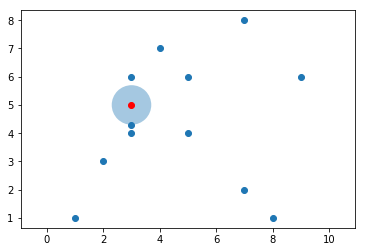

In [11]:
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse, Circle


data = [[2, 3], [5, 4], [9, 6], [4, 7], [8, 1], [7, 2],
    [5, 6], [3, 6], [7, 8], [3, 4], [1, 1], [3, 4.3]]
data = np.array(data)
point = np.array([3, 5])
kdtree = kd_build(data)
nd, nn = nn_search(point, kdtree, 2)

print('最近距离', nd)
print('最近邻点', nn)

fig = plt.figure()
plt.plot(data[:, 0], data[:, 1], 'o')
plt.plot(point[0], point[1],'ro')
ax = fig.add_subplot(111)
cir1 = Circle(xy = (point[0], point[1]), radius = nd, alpha = 0.4)
ax.add_patch(cir1)
plt.axis('scaled')
plt.axis('equal') 

### 例2：看看3维数据的表现：

最近距离 1.118033988749895
最近邻点 [3 4 5]


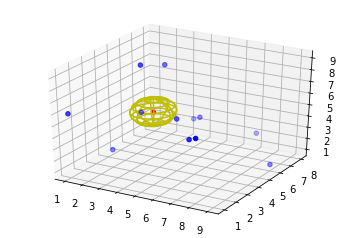

In [12]:
from mpl_toolkits.mplot3d import Axes3D

data3 = [[2, 3, 2], [5, 4, 5], [9, 6, 1], [4, 7, 3], [8, 1, 6], [7, 2, 5],
    [5, 6, 4], [3, 6, 8], [7, 8, 2], [3, 4, 5], [1, 1, 6], [3, 4, 9]]
data3 = np.array(data3)
point3 = np.array([3, 5, 4.5])
kdtree3 = kd_build(data3)
nd3, nn3 = nn_search(point3, kdtree3, 2)
print('最近距离', nd3)
print('最近邻点', nn3)

x, y, z = data3[:, 0], data3[:, 1], data3[:,2]
ax3 = plt.axes(projection='3d')  # 创建一个三维的绘图工程
ax3.scatter3D(x, y, z, c='b')  # 绘制数据点
ax3.scatter3D(point3[0], point3[1], point3[2], c='r')  # 绘制数据点

# center and radius
center = point3
radius = nd3
# data
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
x = radius * np.outer(np.cos(u), np.sin(v)) + center[0]
y = radius * np.outer(np.sin(u), np.sin(v)) + center[1]
z = radius * np.outer(np.ones(np.size(u)), np.cos(v)) + center[2]

ax3.plot_wireframe(x, y, z,  rstride=12, cstride=12, color='y')


### 例3：以 MNIST 数据集测试

由于数据维数大，运行时间长，首先定义一个进度条类用于实时显示处理的进度。

In [13]:
import sys

class ShowProcess():
    """
    显示处理进度的类
    调用该类相关函数即可实现处理进度的显示
    """
    i = 0 # 当前的处理进度
    max_steps = 0 # 总共需要处理的次数
    max_arrow = 50 #进度条的长度

    # 初始化函数，需要知道总共的处理次数
    def __init__(self, max_steps):
        self.max_steps = max_steps
        self.i = 0

    # 显示函数，根据当前的处理进度i显示进度
    # 效果为[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>]100.00%
    def show_process(self, i=None):
        if i is not None:
            self.i = i
        else:
            self.i += 1
        num_arrow = int(self.i * self.max_arrow / self.max_steps) #计算显示多少个'>'
        num_line = self.max_arrow - num_arrow #计算显示多少个'-'
        percent = self.i * 100.0 / self.max_steps #计算完成进度，格式为xx.xx%
        process_bar = '[' + '>' * num_arrow + '-' * num_line + ']'\
                      + '%.2f' % percent + '%' + '\r' #带输出的字符串，'\r'表示不换行回到最左边
        sys.stdout.write(process_bar) #这两句打印字符到终端
        sys.stdout.flush()

    def close(self, words='done'):
        print(' ')
        print(words)
        self.i = 0

从测试集取100个点进行测试，得到最近邻误差为3%：

In [14]:
t1 = time.time()

kdtree = kd_build(imdata_ar)

is_right = []
results = []
max_steps = 100
process_bar = ShowProcess(max_steps) # 1.在循环前定义类的实体， max_steps是总的步数 
for i in range(100):
    point = tsdata_ar[i]
    nn = nn_search(point, kdtree)
    res = imlab[imdata.index(nn[1].tolist())]
    results.append(res)
    if res == tslab[i]:
        is_right.append(1)
    else:
        is_right.append(0)
    process_bar.show_process()      # 2.显示当前进度

error = is_right.count(0) / len(is_right)
process_bar.close('done')            # 3.处理结束后显示消息  
t2 = time.time()
print('最近邻下错误率为：',error)
print('运行时间为:', t2-t1)

 >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>]100.00%
done
最近邻下错误率为： 0.0
运行时间为: 92.87096619606018


## 3.5 kd 树的k近邻搜索

相比最近邻，k 近邻需要维护 k 个近邻点数据，并且进行近邻比较时，应与当前 k 个近邻点的最大距离相比，其余步骤不变。这里采用堆进行 k 近邻数据的维护。数据格式为`(距离， 点)`，由于 Python 中未提供大顶堆，因此这里的距离取负，以实现大顶堆的功能。具体实现如下：

In [15]:
import heapq

def kd_search(point, kdtree, k=1, p=2):
    '''
    功能：求点在 kd 树中 k 个近邻点;
    输入：point: 目标点为 1*n 的 np.array; 
        kdtree: kd树对象;
        k: 近邻点数 k, 默认为1, 即最近邻;
        p: Lp 距离度量参数, 默认为2, 即欧式距离;
    输出：[[距离1， 点1], [距离2， 点2],...,[距离k， 点k]];
    '''
    leaf, route = find_leaf(point, kdtree)
    nearest_distance = get_distance(point, leaf.point, p)
    point_list = [] #建立空堆，用于保存距离及k近邻点，python只有小顶堆，采用取负的形式实现“大顶堆”
    heapq.heappush(point_list, [-nearest_distance, list(leaf.point)])
    for i in range(len(route)): #按照搜索路径由下向上迭代寻找近邻点
        parent = find_node(kdtree, route[:-(i+1)])
        if route[-(i+1)] and parent.lchild: #若当前节点为其父节点的右节点，且其父节点的左子节点存在，则兄弟节点为其父节点的左子节点
            brother = parent.lchild
        elif not route[-(i+1)] and parent.rchild: #若当前节点为其父节点的左节点，且其父节点的右子节点存在，则兄弟节点为其父节点的右子节点
            brother = parent.rchild
        else: #否则当前节点无兄弟节点
            brother = None
        current_distance = get_distance(point, parent.point, p)
        if len(point_list) < k: #成对的取前k(k为偶数时是k+1)个父节点和兄弟节点存入堆中
            heapq.heappush(point_list, [-current_distance, list(parent.point)])
            if brother:
                current_distance = get_distance(point, brother.point, p)
                heapq.heappush(point_list, [-current_distance, list(brother.point)])
        else:
            heapq.heappushpop(point_list, [-current_distance, list(parent.point)])
            if brother:
                dist = np.abs(parent.point[parent.dim] - point[parent.dim]) #当前点到其父节点的距离
                if -point_list[0][0] > dist: #堆中最大距离大于当前点到其父节点的距离（球体相交）
                    temp_list = kd_search(point, brother, k, p)  #递归地在子空间进行近邻搜索
                    for i in range(len(temp_list)): #将堆中的距离变为正
                        temp_list[i][0] = -temp_list[i][0]
                    for i in temp_list:
                        heapq.heappushpop(point_list, i)  #更新point_list
    for i in range(len(point_list)): #将堆中的距离变为正
        point_list[i][0] = -point_list[i][0]
    return heapq.nsmallest(min(k, len(point_list)), point_list)

def decision(labels_list):
    count = np.bincount(labels_list)
    return np.argmax(count)

同样的，采用 MNIST 数据进行测试，实际表现来看时间花费甚至比原始的 k 近邻更多。猜测主要原因是数据维数太大，当进行相交球判断时，球半径往往是大于点到超平面的距离的，需要对每个节点的子空间进行递归的搜索，浪费大量时间。

In [16]:
t1 = time.time()

is_right = []
result = []
k, p = 7, 2
max_steps = 10
process_bar = ShowProcess(max_steps) # 1.在循环前定义类的实体， max_steps是总的步数 
for i in range(10):
    lab_list = []
    point = tsdata_ar[i]
    k_nn = kd_search(point, kdtree, k, p)
    for j in range(len(k_nn)):
        res = imlab[imdata.index(k_nn[j][1])]
        lab_list.append(res)
    result.append(decision(lab_list))
    if result[-1] == tslab[i]:
        is_right.append(1)
    else:
        is_right.append(0)
    process_bar.show_process()      # 2.显示当前进度

error = is_right.count(0) / len(is_right)
process_bar.close('done')            # 3.处理结束后显示消息  
t2 = time.time()
print('{0}近邻下错误率为：{1}'.format(k, error))
print('运行时间为:', t2-t1)


 >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>]100.00%
done
7近邻下错误率为：0.0
运行时间为: 52.48267722129822


为了验证猜测，采用遍历的方法对前100个数据求其最近邻距离。

In [17]:
t1 = time.time()

k = 1 
p = 2
dist_list = []
max_steps = 100
process_bar = ShowProcess(max_steps) # 1.在循环前定义类的实体， max_steps是总的步数 
for i in range(100):
    dist, point, labels = knn(tsdata_ar[i], imdata_ar, k, p, imlab_ar)
    dist_list.append(int(dist[0]))
    process_bar.show_process()      # 2.显示当前进度
    
t2 = time.time()
process_bar.close('done')            # 3.处理结束后显示消息 
print('最近邻距离为：', dist_list)
print('运行时间为:', t2-t1)

 >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>]100.00%
done
最近邻距离为： [676, 1162, 321, 1221, 1092, 298, 1302, 1289, 1735, 991, 1100, 1464, 828, 896, 621, 1416, 881, 809, 1634, 912, 966, 951, 1211, 1212, 1114, 1388, 1045, 1039, 1153, 489, 1217, 431, 804, 1384, 804, 1530, 1247, 321, 1280, 480, 439, 1031, 1040, 1500, 1131, 1263, 635, 1312, 1272, 1054, 953, 1285, 1219, 1168, 1242, 730, 1204, 390, 901, 1027, 1220, 1657, 1042, 1326, 1466, 1029, 1254, 1198, 958, 873, 1025, 1013, 1542, 1123, 437, 982, 932, 1366, 981, 959, 1074, 1081, 1252, 857, 1458, 1312, 775, 1480, 1051, 589, 1081, 908, 1045, 1173, 709, 1653, 705, 1263, 1122, 990]
运行时间为: 47.34333539009094


可以看出几乎所有的最近距离都大于255，而点到超平面的距离最大才为 255-0=255，也就是说在进行相交球判定时，几乎所有判定的结果都是相交，特别对于根节点，如果判定相交则要在另一方向进行递归的求最近邻，整个寻找最近邻的过程相当于将所有样本遍历了一遍，再加上各种条件判断和算法复杂性升高，时间超过线性的k近邻也就不难理解了。所以，这种方法并不适合高维数的情况。

对于kd树的这种缺点，很多学者提出改进的方法，例如BBF算法，更多资料可以参考 https://blog.csdn.net/v_july_v/article/details/8203674 。